In [1]:
# Import Libraries
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bioinformatics Libraries
import scanpy as sc

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the pbmc3k dataset
adata = sc.datasets.pbmc3k()

print(adata)

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'


In [3]:
# Basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata)


AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'


In [4]:
# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)

# Logarithmize the data
sc.pp.log1p(adata)

# Store the raw data
adata.raw = adata



In [5]:
# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# Filter the data
adata = adata[:, adata.var.highly_variable]

# Summarize the highly variable genes
print(adata.var.highly_variable.sum())


1872


In [6]:
adata

View of AnnData object with n_obs × n_vars = 2700 × 1872
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

## Dimension Reduction

### ICA

In [7]:
from sklearn.decomposition import FastICA

# Assume 'adata' is your AnnData object and has been preprocessed appropriately
X = adata.X.toarray()  # Convert sparse matrix to dense

# Initialize ICA with the number of components, you can adjust this number
n_components = 10
ica = FastICA(n_components=n_components)

# Fit ICA on the dataset
X_ica = ica.fit_transform(X)

# The result is stored in 'X_ica', which we can add back to the AnnData object
adata.obsm['X_ica'] = X_ica

# Now we can look at the shape of the ICA result
print(X_ica.shape)


(2700, 10)


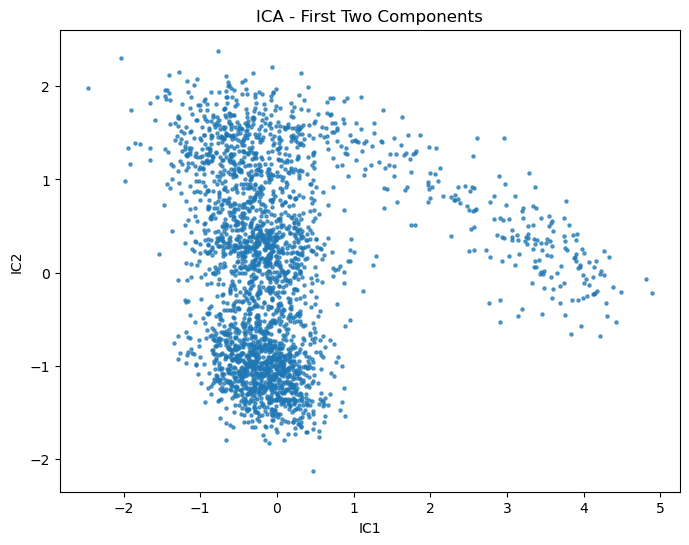

In [8]:
# Extract the first two independent components
ica_comp1 = adata.obsm['X_ica'][:, 0]
ica_comp2 = adata.obsm['X_ica'][:, 1]

# Create a scatter plot of the first two independent components
plt.figure(figsize=(8, 6))
plt.scatter(ica_comp1, ica_comp2, s=5, alpha=0.7)
plt.title('ICA - First Two Components')
plt.xlabel('IC1')
plt.ylabel('IC2')
plt.show()
